In [1]:
import pandas as pd

In [2]:
import numpy as np

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Data

In [3]:
df = pd.read_csv('movie_data.csv')
df.head()

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actor,movie_facebook_likes
0,James Cameron,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,2009.0,English,USA,237000000.0,7.9,Wes Studi,33000.0
1,Gore Verbinski,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean At World's End,2007.0,English,USA,300000000.0,7.1,Jack Davenport,0.0
2,Sam Mendes,148.0,200074175.0,Action|Adventure|Thriller,Spectre,2015.0,English,UK,245000000.0,6.8,Stephanie Sigman,85000.0
3,Christopher Nolan,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,2012.0,English,USA,250000000.0,8.5,Joseph Gordon-Levitt,164000.0
4,Doug Walker,NaN,NaN,Documentary,Star Wars Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,7.1,NaN,0.0


## Data Preprocessing and Data Cleaning

In [4]:
df.isnull().sum()

director_name           104
duration                 15
gross                   884
genres                    0
movie_title               0
title_year              109
language                 13
country                   6
budget                  493
imdb_score                1
actor                    24
movie_facebook_likes      1
dtype: int64

In [6]:
df = df[df['language']!= 'None']

In [7]:
df.dropna(inplace = True)

In [8]:
df[df.duplicated(['movie_title'], keep=False)].sort_values('movie_title', ascending=False).head()

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actor,movie_facebook_likes
1697,Paul McGuigan,114.0,12831121.0,Drama|Mystery|Romance|Thriller,Wicker Park,2004.0,English,USA,30000000.0,7.0,Mark Camacho,0.0
2169,Paul McGuigan,114.0,12831121.0,Drama|Mystery|Romance|Thriller,Wicker Park,2004.0,English,USA,30000000.0,7.0,Mark Camacho,0.0
2099,Paul McGuigan,110.0,5773519.0,Drama|Horror|Sci-Fi|Thriller,Victor Frankenstein,2015.0,English,USA,40000000.0,6.0,Daniel Mays,11000.0
1146,Paul McGuigan,110.0,5773519.0,Drama|Horror|Sci-Fi|Thriller,Victor Frankenstein,2015.0,English,USA,40000000.0,6.0,Daniel Mays,11000.0
1305,Paul McGuigan,110.0,5773519.0,Drama|Horror|Sci-Fi|Thriller,Victor Frankenstein,2015.0,English,USA,40000000.0,6.0,Daniel Mays,11000.0


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df['revenue_ratio(%)'] = df['gross']/df['budget']*100

In [11]:
df.describe()

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes,revenue_ratio(%)
count,3776.000000,3.776000e+03,3776.000000,3.776000e+03,3776.000000,3776.000000,3776.000000
mean,109.867055,5.035719e+07,2003.046081,4.482465e+07,6.460275,8925.691737,618.114185
std,22.738463,6.878477e+07,9.846611,2.254755e+08,1.057469,21216.768696,13139.901008
min,34.000000,1.620000e+02,1927.000000,2.180000e+02,1.600000,0.000000,0.001800
25%,95.000000,6.657827e+06,1999.000000,1.000000e+07,5.900000,0.000000,44.838054
50%,106.000000,2.735940e+07,2005.000000,2.400000e+07,6.600000,187.500000,106.909443
75%,120.000000,6.500176e+07,2010.000000,5.000000e+07,7.200000,10000.000000,222.544811
max,330.000000,7.605058e+08,2016.000000,1.221550e+10,9.300000,349000.000000,719448.553333


In [12]:
df.head()

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actor,movie_facebook_likes,revenue_ratio(%)
0,James Cameron,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,2009.0,English,USA,237000000.0,7.9,Wes Studi,33000.0,320.888543
1,Gore Verbinski,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean At World's End,2007.0,English,USA,300000000.0,7.1,Jack Davenport,0.0,103.134717
2,Sam Mendes,148.0,200074175.0,Action|Adventure|Thriller,Spectre,2015.0,English,UK,245000000.0,6.8,Stephanie Sigman,85000.0,81.662929
3,Christopher Nolan,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,2012.0,English,USA,250000000.0,8.5,Joseph Gordon-Levitt,164000.0,179.252257
5,Andrew Stanton,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,2012.0,English,USA,263700000.0,6.6,Polly Walker,24000.0,27.705225


In [13]:
df.describe()

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes,revenue_ratio(%)
count,3776.000000,3.776000e+03,3776.000000,3.776000e+03,3776.000000,3776.000000,3776.000000
mean,109.867055,5.035719e+07,2003.046081,4.482465e+07,6.460275,8925.691737,618.114185
std,22.738463,6.878477e+07,9.846611,2.254755e+08,1.057469,21216.768696,13139.901008
min,34.000000,1.620000e+02,1927.000000,2.180000e+02,1.600000,0.000000,0.001800
25%,95.000000,6.657827e+06,1999.000000,1.000000e+07,5.900000,0.000000,44.838054
50%,106.000000,2.735940e+07,2005.000000,2.400000e+07,6.600000,187.500000,106.909443
75%,120.000000,6.500176e+07,2010.000000,5.000000e+07,7.200000,10000.000000,222.544811
max,330.000000,7.605058e+08,2016.000000,1.221550e+10,9.300000,349000.000000,719448.553333


In [15]:
df['genres']= df.genres.apply(lambda x :x.replace('|',','))

In [16]:
df['title_year']= df['title_year'].astype(int)

In [17]:
df['budget'] = df.budget[df.budget<1000000000]

In [18]:
df.dropna(inplace = True)

In [19]:
df.head()

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actor,movie_facebook_likes,revenue_ratio(%)
0,James Cameron,178.0,760505847.0,"Action,Adventure,Fantasy,Sci-Fi",Avatar,2009,English,USA,237000000.0,7.9,Wes Studi,33000.0,320.888543
1,Gore Verbinski,169.0,309404152.0,"Action,Adventure,Fantasy",Pirates of the Caribbean At World's End,2007,English,USA,300000000.0,7.1,Jack Davenport,0.0,103.134717
2,Sam Mendes,148.0,200074175.0,"Action,Adventure,Thriller",Spectre,2015,English,UK,245000000.0,6.8,Stephanie Sigman,85000.0,81.662929
3,Christopher Nolan,164.0,448130642.0,"Action,Thriller",The Dark Knight Rises,2012,English,USA,250000000.0,8.5,Joseph Gordon-Levitt,164000.0,179.252257
5,Andrew Stanton,132.0,73058679.0,"Action,Adventure,Sci-Fi",John Carter,2012,English,USA,263700000.0,6.6,Polly Walker,24000.0,27.705225


## Finding Top Genres Before and After 2000

In [20]:
def total_genres(df):
    genre_list = set()
    for index,row in df.iterrows():
        temp = row['genres'].split(',')
        for i in temp:
            genre_list.add(i)
    return(list(genre_list))#forget to use return will make a nonetype object
        

In [21]:
def convert_dict(lst):
    res_dct = {lst[i]: 0 for i in range(len(lst))}
    return(res_dct)

In [22]:
genres = total_genres(df)
print(genres)
print(type(genres))

['Action', 'Western', 'Sport', 'Musical', 'Sci-Fi', 'Romance', 'Fantasy', 'Animation', 'Comedy', 'Adventure', 'Crime', 'Thriller', 'Mystery', 'Drama', 'Film-Noir', 'Documentary', 'Biography', 'Short', 'History', 'Horror', 'War', 'Music', 'Family']
<class 'list'>


In [23]:
genres_dict=convert_dict(genres)
print(genres_dict)

{'Action': 0, 'Western': 0, 'Sport': 0, 'Musical': 0, 'Sci-Fi': 0, 'Romance': 0, 'Fantasy': 0, 'Animation': 0, 'Comedy': 0, 'Adventure': 0, 'Crime': 0, 'Thriller': 0, 'Mystery': 0, 'Drama': 0, 'Film-Noir': 0, 'Documentary': 0, 'Biography': 0, 'Short': 0, 'History': 0, 'Horror': 0, 'War': 0, 'Music': 0, 'Family': 0}


In [24]:
def trend_movie(dct,df):
    for index,row in df.iterrows():
        temp = row['genres'].split(',')
        for i in temp:
            dct[i]+=1
    return dct

In [25]:
df_before2000 = df[df.title_year<2000]

In [26]:
df_after2000 = df[df.title_year>=2000]
df_after2000

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actor,movie_facebook_likes,revenue_ratio(%)
0,James Cameron,178.0,760505847.0,"Action,Adventure,Fantasy,Sci-Fi",Avatar,2009,English,USA,237000000.0,7.9,Wes Studi,33000.0,320.888543
1,Gore Verbinski,169.0,309404152.0,"Action,Adventure,Fantasy",Pirates of the Caribbean At World's End,2007,English,USA,300000000.0,7.1,Jack Davenport,0.0,103.134717
2,Sam Mendes,148.0,200074175.0,"Action,Adventure,Thriller",Spectre,2015,English,UK,245000000.0,6.8,Stephanie Sigman,85000.0,81.662929
3,Christopher Nolan,164.0,448130642.0,"Action,Thriller",The Dark Knight Rises,2012,English,USA,250000000.0,8.5,Joseph Gordon-Levitt,164000.0,179.252257
5,Andrew Stanton,132.0,73058679.0,"Action,Adventure,Sci-Fi",John Carter,2012,English,USA,263700000.0,6.6,Polly Walker,24000.0,27.705225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Jafar Panahi,90.0,673780.0,Drama,The Circle,2000,Persian,Iran,10000.0,7.5,Mojgan Faramarzi,697.0,6737.800000
5033,Shane Carruth,77.0,424760.0,"Drama,Sci-Fi,Thriller",Primer,2004,English,USA,7000.0,7.0,Casey Gooden,19000.0,6068.000000
5034,Neill Dela Llana,80.0,70071.0,Thriller,Cavite,2005,English,Philippines,7000.0,6.3,Quynn Ton,74.0,1001.014286
5037,Edward Burns,95.0,4584.0,"Comedy,Drama",Newlyweds,2011,English,USA,9000.0,6.4,Daniella Pineda,413.0,50.933333


In [27]:
genres_dict=convert_dict(genres)
trend_count_before2000 = trend_movie(genres_dict,df_before2000)
print(trend_count_before2000)

{'Action': 277, 'Western': 28, 'Sport': 33, 'Musical': 43, 'Sci-Fi': 150, 'Romance': 231, 'Fantasy': 137, 'Animation': 25, 'Comedy': 390, 'Adventure': 218, 'Crime': 208, 'Thriller': 311, 'Mystery': 90, 'Drama': 525, 'Film-Noir': 1, 'Documentary': 5, 'Biography': 61, 'Short': 1, 'History': 44, 'Horror': 116, 'War': 45, 'Music': 42, 'Family': 92}


In [28]:
genres_dict=convert_dict(genres)
trend_count_after2000 = trend_movie(genres_dict,df_after2000)
print(trend_count_after2000)

{'Action': 654, 'Western': 30, 'Sport': 114, 'Musical': 59, 'Sci-Fi': 330, 'Romance': 634, 'Fantasy': 356, 'Animation': 168, 'Comedy': 1101, 'Adventure': 542, 'Crime': 493, 'Thriller': 775, 'Mystery': 286, 'Drama': 1380, 'Film-Noir': 0, 'Documentary': 55, 'Biography': 181, 'Short': 0, 'History': 107, 'Horror': 262, 'War': 113, 'Music': 115, 'Family': 347}


In [29]:
from collections import Counter
sorted_dict_before2000 = dict(Counter(trend_count_before2000).most_common(7))
sorted_dict_before2000

{'Drama': 525,
 'Comedy': 390,
 'Thriller': 311,
 'Action': 277,
 'Romance': 231,
 'Adventure': 218,
 'Crime': 208}

In [30]:
sorted_dict_after2000 = dict(Counter(trend_count_after2000).most_common(7))
sorted_dict_after2000

{'Drama': 1380,
 'Comedy': 1101,
 'Thriller': 775,
 'Action': 654,
 'Romance': 634,
 'Adventure': 542,
 'Crime': 493}

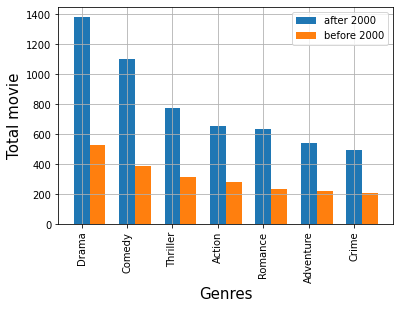

In [31]:
w=0.35
bar1 = np.arange(len(range(0,7)))
bar2 = [i+w for i in bar1]
number = list(sorted_dict_before2000.values())
gen = list(sorted_dict_before2000.keys())
number2 = list(sorted_dict_after2000.values())
gen2 = list(sorted_dict_after2000.keys())
plt.bar(bar1,number2,w)
plt.bar(bar2,number,w)
plt.xticks(bar1,gen, rotation = 90)
plt.xlabel('Genres',fontsize = 15)
plt.ylabel('Total movie',fontsize = 15)
plt.legend(['after 2000','before 2000'])
plt.grid()
plt.show()

## Finding The Average Revenue and Budget of Top 3 Genres Each Year

In [32]:
list_year = [i for i in range(2000,2017)]
dict_gross = convert_dict(list_year)
dict_budget =convert_dict(list_year)
count_year = convert_dict(list_year)

In [33]:
def movie_drama(dct1,dct2,dct3,df):
    dct1 = convert_dict(list_year)
    dct2 =convert_dict(list_year)
    dct3 = convert_dict(list_year)
    for index,row in df.iterrows():
        temp = row['genres'].split(',')
        years = row['title_year']
        if 'Drama' in temp:
            dct3[years]+=1
            dct1[years]+=row['gross']
            dct2[years]+=row['budget']
        else:
            continue
    for i in range(2000,2017):
        dct1[i]=dct1[i]/dct3[i]
        dct2[i]=dct2[i]/dct3[i]
    return dct1,dct2,dct3

In [34]:
def movie_comedy(dct1,dct2,dct3,df):
    dct1 = convert_dict(list_year)
    dct2 =convert_dict(list_year)
    dct3 = convert_dict(list_year)
    for index,row in df.iterrows():
        temp = row['genres'].split(',')
        years = row['title_year']
        if 'Comedy' in temp:
            dct3[years]+=1
            dct1[years]+=row['gross']
            dct2[years]+=row['budget']
        else:
            continue
    for i in range(2000,2017):
        dct1[i]=dct1[i]/dct3[i]
        dct2[i]=dct2[i]/dct3[i]
    return dct1,dct2,dct3

In [35]:
def movie_thriller(dct1,dct2,dct3,df):
    dct1 = convert_dict(list_year)
    dct2 =convert_dict(list_year)
    dct3 = convert_dict(list_year)
    for index,row in df.iterrows():
        temp = row['genres'].split(',')
        years = row['title_year']
        if 'Thriller' in temp:
            dct3[years]+=1
            dct1[years]+=row['gross']
            dct2[years]+=row['budget']
        else:
            continue
    for i in range(2000,2017):
        dct1[i]=dct1[i]/dct3[i]
        dct2[i]=dct2[i]/dct3[i]
    return dct1,dct2,dct3

In [36]:
drama_year_gross,drama_year_budget,drama_count = movie_drama(dict_gross,dict_budget,count_year,df_after2000)
print(drama_year_budget)

{2000: 30579240.963855423, 2001: 35084705.88235294, 2002: 26100230.816513762, 2003: 28878000.0, 2004: 28427066.96590909, 2005: 27914581.63265306, 2006: 33055211.53846154, 2007: 26183378.37837838, 2008: 37335130.43478261, 2009: 28810159.574468084, 2010: 35525792.682926826, 2011: 25739073.17073171, 2012: 28920892.605633803, 2013: 27745977.91566265, 2014: 34822692.307692304, 2015: 34226855.11764706, 2016: 42005454.54545455}


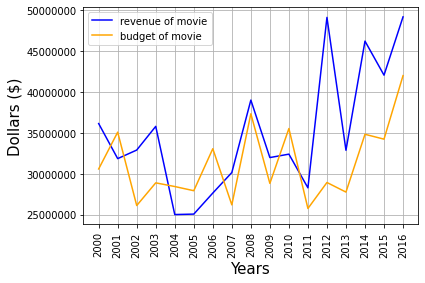

In [37]:
drama_year = [x for x in drama_year_gross.keys()]
drama_gross = [x for x in drama_year_gross.values()]
drama_budget =[x for x in drama_year_budget.values()]
plt.plot(drama_year,drama_gross,color='blue')
plt.plot(drama_year,drama_budget,color='orange')
plt.xticks(drama_year, rotation = 90)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Dollars ($)', fontsize = 15)
plt.ticklabel_format(style='plain') 
plt.legend(['revenue of movie','budget of movie'])
plt.grid()
plt.show()

In [38]:
comedy_year_gross,comedy_year_budget,comedy_count = movie_comedy(dict_gross,dict_budget,count_year,df_after2000)
print(comedy_year_budget)

{2000: 32875000.0, 2001: 27242584.26966292, 2002: 28384617.423076924, 2003: 36322794.11764706, 2004: 34248373.4939759, 2005: 35617569.44444445, 2006: 33947183.09859155, 2007: 34613392.85714286, 2008: 36126760.56338028, 2009: 39093055.55555555, 2010: 41695410.95890411, 2011: 44528608.69565217, 2012: 41800000.0, 2013: 40942105.2631579, 2014: 43382340.42553192, 2015: 47664102.56410257, 2016: 54760869.56521739}


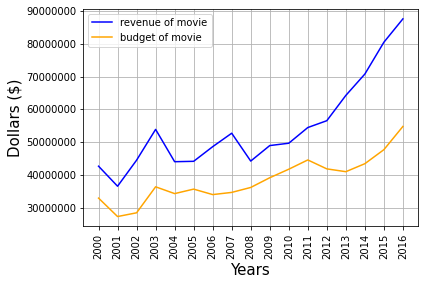

In [39]:
comedy_year = [x for x in comedy_year_gross.keys()]
comedy_gross = [x for x in comedy_year_gross.values()]
comedy_budget =[x for x in comedy_year_budget.values()]
plt.plot(comedy_year,comedy_gross,color='blue')
plt.plot(comedy_year,comedy_budget,color='orange')
plt.xticks(comedy_year, rotation = 90)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Dollars ($)', fontsize = 15)
plt.ticklabel_format(style='plain') 
plt.legend(['revenue of movie','budget of movie'])
plt.grid()
plt.show()

In [40]:
thriller_year_gross,thriller_year_budget,thriller_count = movie_thriller(dict_gross,dict_budget,count_year,df_after2000)
print(thriller_count)

{2000: 45, 2001: 51, 2002: 58, 2003: 42, 2004: 47, 2005: 54, 2006: 52, 2007: 44, 2008: 45, 2009: 44, 2010: 48, 2011: 51, 2012: 48, 2013: 48, 2014: 40, 2015: 38, 2016: 20}


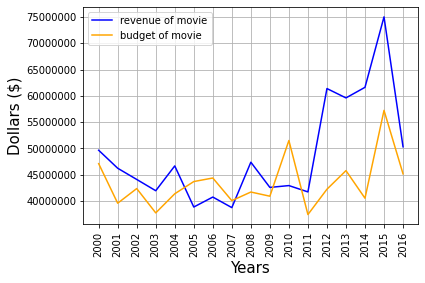

In [41]:
thriller_year = [x for x in thriller_year_gross.keys()]
thriller_gross = [x for x in thriller_year_gross.values()]
thriller_budget =[x for x in thriller_year_budget.values()]
plt.plot(thriller_year,thriller_gross,color='blue')
plt.plot(thriller_year,thriller_budget,color='orange')
plt.xticks(thriller_year, rotation = 90)
plt.ticklabel_format(style='plain') 
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Dollars ($)', fontsize = 15)
plt.legend(['revenue of movie','budget of movie'])
plt.grid()
plt.show()

In [43]:
len(df_after2000)

2739

In [44]:
len(df_after2000['director_name'].unique())

1424

In [45]:
len(df_after2000['actor'].unique())

2069

## Machine learning : Clustering

In [46]:
from sklearn.preprocessing import StandardScaler
X = df_after2000[['gross','imdb_score','revenue_ratio(%)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 9.96829460e+00,  1.44213134e+00, -1.67454076e-02],
       [ 3.62982481e+00,  6.77220857e-01, -3.15555637e-02],
       [ 2.09361963e+00,  3.90379425e-01, -3.30159309e-02],
       ...,
       [-7.16655713e-01, -8.76896285e-02,  2.95121882e-02],
       [-7.17575877e-01,  7.92418219e-03, -3.51059521e-02],
       [-7.16442825e-01,  1.99151804e-01,  4.88359849e-01]])

In [47]:
from sklearn.cluster import KMeans

In [48]:
k_rng = range(1,15)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(X_scaled)
    sse.append(km.inertia_)

In [49]:
sse

[8216.999999999998,
 5824.906701680702,
 3911.6853502540516,
 2419.8657183626215,
 1980.733312460974,
 1588.9196643471073,
 1248.2128085978059,
 1053.0448920940812,
 906.6871802674301,
 796.939415645802,
 722.865685298677,
 660.6678827139408,
 597.0342909613362,
 536.4586588776834]

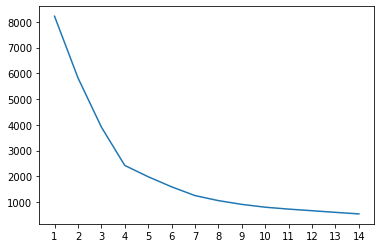

In [50]:
plt.plot(k_rng,sse)
plt.xticks(k_rng)
plt.grid
plt.show()

In [51]:
km = KMeans (n_clusters = 4)
tier = km.fit_predict(X_scaled)
tier

array([3, 3, 3, ..., 0, 0, 0])

In [52]:
df_after2000['tier']= tier
df_after2000

C:\Users\russe\AppData\Local\Temp/ipykernel_10304/2254638202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after2000['tier']= tier


,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actor,movie_facebook_likes,revenue_ratio(%),tier
0,James Cameron,178.0,760505847.0,"Action,Adventure,Fantasy,Sci-Fi",Avatar,2009,English,USA,237000000.0,7.9,Wes Studi,33000.0,320.888543,3
1,Gore Verbinski,169.0,309404152.0,"Action,Adventure,Fantasy",Pirates of the Caribbean At World's End,2007,English,USA,300000000.0,7.1,Jack Davenport,0.0,103.134717,3
2,Sam Mendes,148.0,200074175.0,"Action,Adventure,Thriller",Spectre,2015,English,UK,245000000.0,6.8,Stephanie Sigman,85000.0,81.662929,3
3,Christopher Nolan,164.0,448130642.0,"Action,Thriller",The Dark Knight Rises,2012,English,USA,250000000.0,8.5,Joseph Gordon-Levitt,164000.0,179.252257,3
5,Andrew Stanton,132.0,73058679.0,"Action,Adventure,Sci-Fi",John Carter,2012,English,USA,263700000.0,6.6,Polly Walker,24000.0,27.705225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Jafar Panahi,90.0,673780.0,Drama,The Circle,2000,Persian,Iran,10000.0,7.5,Mojgan Faramarzi,697.0,6737.800000,0
5033,Shane Carruth,77.0,424760.0,"Drama,Sci-Fi,Thriller",Primer,2004,English,USA,7000.0,7.0,Casey Gooden,19000.0,6068.000000,0
5034,Neill Dela Llana,80.0,70071.0,Thriller,Cavite,2005,English,Philippines,7000.0,6.3,Quynn Ton,74.0,1001.014286,0
5037,Edward Burns,95.0,4584.0,"Comedy,Drama",Newlyweds,2011,English,USA,9000.0,6.4,Daniella Pineda,413.0,50.933333,0


In [53]:
df_after2000.groupby('tier').mean()

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes,revenue_ratio(%)
tier,,,,,,,
0,110.094434,3.152996e+07,2007.526579,3.141141e+07,6.910694,10959.300813,378.026478
1,84.000000,1.079173e+08,2007.000000,1.500000e+04,6.300000,12000.000000,719448.553333
2,100.039306,3.321352e+07,2007.078613,3.693178e+07,5.196532,4052.803468,181.853393
3,123.200730,2.213018e+08,2008.686131,1.207730e+08,7.136496,35233.576642,262.996048


In [54]:
df_after2000.groupby('tier').count()

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actor,movie_facebook_likes,revenue_ratio(%)
tier,,,,,,,,,,,,,
0,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,865,865,865,865,865,865,865,865,865,865,865,865,865
3,274,274,274,274,274,274,274,274,274,274,274,274,274


In [60]:
df_after2000[df_after2000.tier==1]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actor,movie_facebook_likes,revenue_ratio(%),tier
4793,Oren Peli,84.0,107917283.0,Horror,Paranormal Activity,2007,English,USA,15000.0,6.3,Amber Armstrong,12000.0,719448.553333,1


## Finding Top 7 Best Actor and Top 7 Best Director of top movies based on clustering

In [56]:
df_good_movie=df_after2000[df_after2000.tier==3]
good_director = df_after2000.groupby('director_name').count
best_director = good_director().sort_values('movie_title',ascending=False).head(7)
best_director

,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actor,movie_facebook_likes,revenue_ratio(%),tier
director_name,,,,,,,,,,,,,
Clint Eastwood,13,13,13,13,13,13,13,13,13,13,13,13,13
Steven Soderbergh,12,12,12,12,12,12,12,12,12,12,12,12,12
Woody Allen,12,12,12,12,12,12,12,12,12,12,12,12,12
Steven Spielberg,12,12,12,12,12,12,12,12,12,12,12,12,12
Shawn Levy,11,11,11,11,11,11,11,11,11,11,11,11,11
Ridley Scott,11,11,11,11,11,11,11,11,11,11,11,11,11
Ron Howard,9,9,9,9,9,9,9,9,9,9,9,9,9


In [57]:
df_good_movie=df_after2000[df_after2000.tier==3]
good_actor = df_after2000.groupby('actor').count
best_actor = good_actor().sort_values('movie_title',ascending=False).head(7)
best_actor
# best_actor[best_actor.actor=='Stephen Root']
# list_best_actor = dict(best_actor)
# list_best_actor

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,movie_facebook_likes,revenue_ratio(%),tier
actor,,,,,,,,,,,,,
Steve Coogan,8,8,8,8,8,8,8,8,8,8,8,8,8
Anne Hathaway,6,6,6,6,6,6,6,6,6,6,6,6,6
Stephen Root,6,6,6,6,6,6,6,6,6,6,6,6,6
Steve Carell,6,6,6,6,6,6,6,6,6,6,6,6,6
Thomas Lennon,6,6,6,6,6,6,6,6,6,6,6,6,6
Bruce McGill,6,6,6,6,6,6,6,6,6,6,6,6,6
Kevin Sussman,5,5,5,5,5,5,5,5,5,5,5,5,5


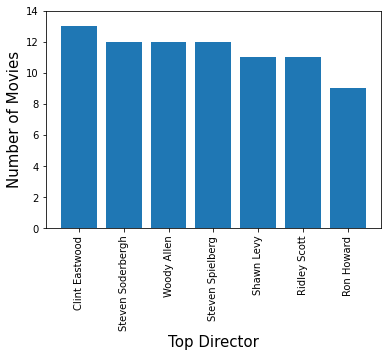

In [58]:
list_director = ['Clint Eastwood','Steven Soderbergh','Woody Allen','Steven Spielberg','Shawn Levy','Ridley Scott','Ron Howard']
count_director =[13,12,12,12,11,11,9]
plt.bar(list_director,count_director)
plt.xlabel ('Top Director',fontsize =15)
plt.ylabel('Number of Movies',fontsize =15)
plt.xticks(rotation = 90)
plt.yticks(range(0,15,2))
plt.show()

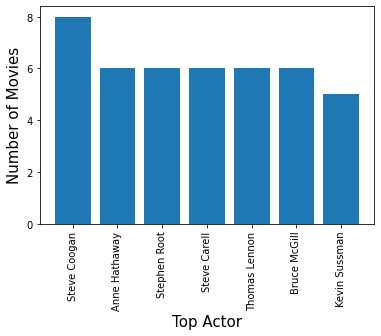

In [59]:
list_actor= ['Steve Coogan','Anne Hathaway','Stephen Root','Steve Carell','Thomas Lennon','Bruce McGill','Kevin Sussman']
count_actor = [8,6,6,6,6,6,5]
count_director =[13,12,12,12,11,11,9]
plt.bar(list_actor,count_actor)
plt.xlabel ('Top Actor',fontsize =15)
plt.ylabel('Number of Movies',fontsize =15)
plt.xticks(rotation = 90)
plt.yticks(range(0,9,2))
plt.show()